## Setup

In [2]:
import os
import pandas as pd
import glob

## paths

In [3]:
region_name = "Ost"
mngmt_name = "Mecklenburg-Vorpommern"
mngmt_filter = "Mecklenburg-Vorpommern"

In [4]:
pth_data = f"C:/Users/u244644/OneDrive - SBB/Daten/Aufgaben/Hack4Rail/Daten/Data"

In [5]:
pth_master = pth_data + f"/master/{region_name}/master_data/master_data.csv"
pth_ris = pth_data + f"/ris/{region_name}/{mngmt_name}/ris_data/ris_data.csv"
pth_pax = pth_data + f"/pax/{region_name}/{mngmt_name}/"

## Load data

In [6]:
df_master = pd.read_csv(pth_master, header=0, sep=';')
df_master.head(3)

,pax_counter_id,equipmentname,station_id,tplnr,tpname,station_name,station_ril100,management_name,region_name,federal_state_name,station_longitude,station_latitude,produktlinie,untersegment
0,a0a3b33115cf,DSA+ Gleis 1,128,00128-01-B01,Bahnsteig 1 (Ri. Ffo-Ebw),Altranft,BART,Cottbus,Ost,Brandenburg,14.082107,52.763368,Zubringerbahnhof,ländlicher Zubringer
1,a0a3b32f9a73,DSA+_Typ2_GL1b_WFW1,276,00276-01-B03,Bahnsteig 1b,Bad Freienwalde (Oder),WFW,Cottbus,Ost,Brandenburg,14.035751,52.789933,Zubringerbahnhof,ländlicher Zubringer
2,a0a3b32f3067,DSA+_Typ2_GL1a_WFW1,276,00276-01-B01,Bahnsteig 1a,Bad Freienwalde (Oder),WFW,Cottbus,Ost,Brandenburg,14.035751,52.789933,Zubringerbahnhof,ländlicher Zubringer


In [7]:
df_ris = pd.read_csv(pth_ris, header=0, sep=';')
df_ris.head(3)

,fahrtid,ereignis_station_id,zeit_echt,zeit_echt_verspaetung,gleis_echt,tpname_bahnsteig_echt,gattung,case
0,20241130-6c7c332f-4123-3241-8638-a4aa5eb9f676,2468,2024-12-01 00:03:14,4,02468-01-B02-G02,Bahnsteig 02,RE,ankunft
1,20241130-6c7c332f-4123-3241-8638-a4aa5eb9f676,2468,2024-12-01 00:04:21,5,02468-01-B02-G02,Bahnsteig 02,RE,abfahrt
2,20241130-2262fbea-4e43-317b-95b1-765ad841fca7,5127,2024-12-01 00:08:07,1,05127-01-B02-G01,Bahnsteig 02,RB,ankunft


In [8]:

csv_files = glob.glob(os.path.join(pth_pax, "*.csv"))
dfs = [pd.read_csv(file, sep=';') for file in csv_files]
df_pax = pd.concat(dfs, ignore_index=True)
df_pax.head(3)

,pax_counter_id,time_iot,data_pax
0,083af23fd0df,2024-12-01 00:00:45,0
1,083af23fd0df,2024-12-01 00:01:45,0
2,083af23fd0df,2024-12-01 00:02:45,0


## joins

In [9]:
df_joined = pd.merge(df_pax, df_master, on='pax_counter_id', how='left')
df_joined.head(3)

,pax_counter_id,time_iot,data_pax,equipmentname,station_id,tplnr,tpname,station_name,station_ril100,management_name,region_name,federal_state_name,station_longitude,station_latitude,produktlinie,untersegment
0,083af23fd0df,2024-12-01 00:00:45,0,DSA+_Typ2_GL2_WBO2,719,00719-01-B02,Bahnsteig 02,Bobitz,WBO,Mecklenburg-Vorpommern,Ost,Mecklenburg-Vorpommern,11.3628,53.804534,Zubringerbahnhof,ländlicher Zubringer
1,083af23fd0df,2024-12-01 00:01:45,0,DSA+_Typ2_GL2_WBO2,719,00719-01-B02,Bahnsteig 02,Bobitz,WBO,Mecklenburg-Vorpommern,Ost,Mecklenburg-Vorpommern,11.3628,53.804534,Zubringerbahnhof,ländlicher Zubringer
2,083af23fd0df,2024-12-01 00:02:45,0,DSA+_Typ2_GL2_WBO2,719,00719-01-B02,Bahnsteig 02,Bobitz,WBO,Mecklenburg-Vorpommern,Ost,Mecklenburg-Vorpommern,11.3628,53.804534,Zubringerbahnhof,ländlicher Zubringer


In [ ]:
unique_station_names = df_joined['station_name'].unique()

for name in unique_station_names:
    print(name)

Bobitz
Hagenow Land
Friedrichsruhe (Meckl)
Schwerin Görries
Kavelstorf
Ventschow
Eggesin
Prora Ost
Sandhagen (b Bad Doberan)
Neustadt-Glewe
Lietzow (Rügen)
Laage (Meckl)
Mistorf
Priemerburg
Boizenburg (Elbe)
Lancken
Parkentin
Sanitz (b Rostock)
Roggentin
Groß Lüsewitz
Mölln (Meckl)
Parchim
Pölchow
Rostock Torfbrücke
Broderstorf
Altefähr
Gelbensande
Schwerin Süd
Graal-Müritz
Ueckermünde
Rövershagen Karls Erlebnisdorf (Purkshof)
Subzin-Liessow
Ueckermünde Stadthafen
Langhagen
Crivitz
Grieben (Meckl)
Ribnitz-Damgarten Ost
Gnevkow
Rambin (Rügen)
Sagard
Kronskamp
Mönchhagen
Utzedel
Tessin
Althof
Samtens
Dorf Mecklenburg
Stralsund Rügendamm
Domsühl
Grabow (Meckl)
Gadebusch
Teschenhagen
Scharstorf
Rehna
Neu Wokern
Holthusen
Plate (Meckl)
Sukow (b Schwerin)
Tessin West
Schwerin-Warnitz
Graal-Müritz-Koppelweg
Rastow
Groß Brütz
Cammin (Meckl)
Bentwisch
Schwerin Industriepark
Lüdersdorf (Meckl)
Moidentin
Lützow
Rostock Kassebohm
Plüschow
Herrnburg
Lüssow (Meckl)
Schwerin-Wüstmark
Prora
Schwerin-L

# Visualize

In [11]:
station_name="Rostock Torfbrücke"

In [ ]:
# holiday table
data = [
    ["Neujahr", "Mi, 01.01.2025", "Vor 174 Tagen"],
    ["Internationaler Frauentag", "Sa, 08.03.2025", "Vor 108 Tagen"],
    ["Karfreitag", "Fr, 18.04.2025", "Vor 67 Tagen"],
    ["Ostermontag", "Mo, 21.04.2025", "Vor 64 Tagen"],
    ["Tag der Arbeit", "Do, 01.05.2025", "Vor 54 Tagen"],
    ["Christi Himmelfahrt", "Do, 29.05.2025", "Vor 26 Tagen"],
    ["Pfingstmontag", "Mo, 09.06.2025", "Vor 15 Tagen"]
]

df_holiday = pd.DataFrame(data, columns=["holiday_name", "date", "Vergangen"])
df_holiday["date"] = pd.to_datetime(df_holiday["date"].str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0], dayfirst=True)
df_holiday["Tage her"] = df_holiday["Vergangen"].str.extract(r'(\d+)').astype(int)
df_holiday


,holiday_name,date,Vergangen,Tage her
0,Neujahr,2025-01-01,Vor 174 Tagen,174
1,Internationaler Frauentag,2025-03-08,Vor 108 Tagen,108
2,Karfreitag,2025-04-18,Vor 67 Tagen,67
3,Ostermontag,2025-04-21,Vor 64 Tagen,64
4,Tag der Arbeit,2025-05-01,Vor 54 Tagen,54
5,Christi Himmelfahrt,2025-05-29,Vor 26 Tagen,26
6,Pfingstmontag,2025-06-09,Vor 15 Tagen,15


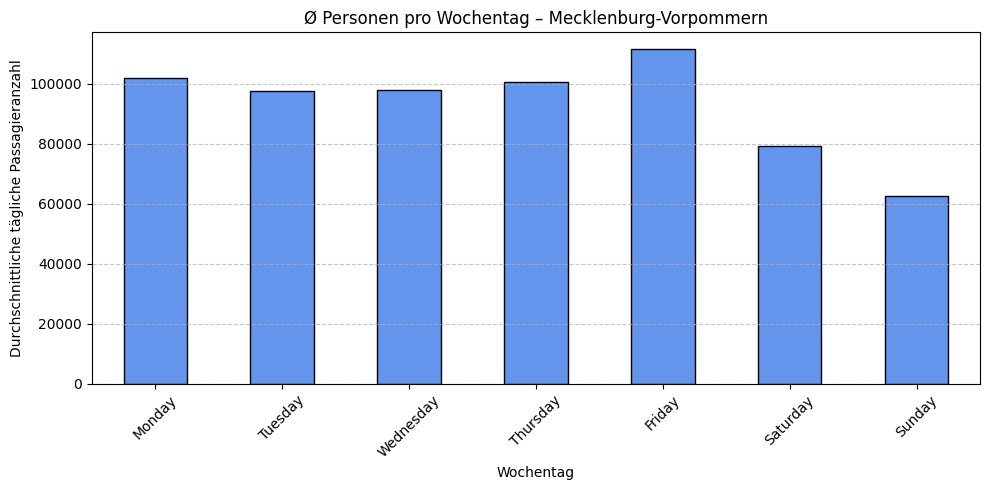

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_hanau = df_joined.copy()

df_hanau["time_iot"] = pd.to_datetime(df_hanau["time_iot"])

df_hanau["date"] = df_hanau["time_iot"].dt.date
daily_totals = df_hanau.groupby("date")["data_pax"].sum().reset_index(name="total_pax")

daily_totals["weekday"] = pd.to_datetime(daily_totals["date"]).dt.day_name()

weekday_avg = daily_totals.groupby("weekday")["total_pax"].mean()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_avg = weekday_avg.reindex(weekday_order)

# plot
plt.figure(figsize=(10, 5))
weekday_avg.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("Ø Personen pro Wochentag – " + mngmt_name)
plt.ylabel("Durchschnittliche tägliche Passagieranzahl")
plt.xlabel("Wochentag")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\u244644\AppData\Local\Temp\ipykernel_23548\754316838.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hanau["hour_ts"] = df_hanau["time_iot"].dt.floor("H")


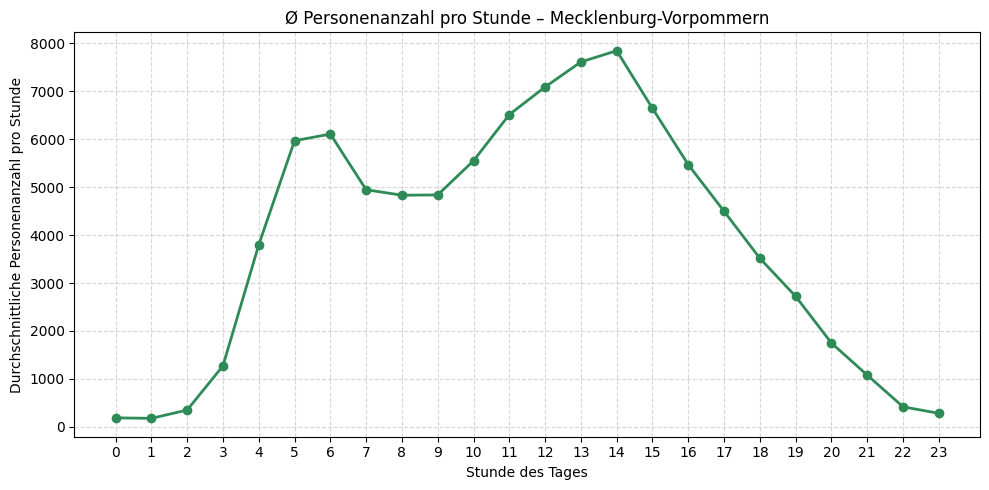

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_hanau = df_joined.copy()

df_hanau["time_iot"] = pd.to_datetime(df_hanau["time_iot"])

df_hanau["hour_ts"] = df_hanau["time_iot"].dt.floor("H")

pax_per_hour = df_hanau.groupby("hour_ts")["data_pax"].sum().reset_index()

pax_per_hour["hour"] = pax_per_hour["hour_ts"].dt.hour

avg_pax_per_hour = pax_per_hour.groupby("hour")["data_pax"].mean()

# plot
plt.figure(figsize=(10, 5))
plt.plot(avg_pax_per_hour.index, avg_pax_per_hour.values, marker='o', color='seagreen', linewidth=2)
plt.title("Ø Personenanzahl pro Stunde – " + mngmt_name)
plt.xlabel("Stunde des Tages")
plt.ylabel("Durchschnittliche Personenanzahl pro Stunde")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df_joined["time_iot"] = pd.to_datetime(df_joined["time_iot"])
df_joined["date"] = df_joined["time_iot"].dt.date
df_joined["weekday"] = df_joined["time_iot"].dt.day_name()

df_holiday["date"] = pd.to_datetime(df_holiday["date"]).dt.date
df_holiday["weekday"] = pd.to_datetime(df_holiday["date"]).dt.day_name()

df_holiday

,holiday_name,date,Vergangen,Tage her,weekday
0,Neujahr,2025-01-01,Vor 174 Tagen,174,Wednesday
1,Internationaler Frauentag,2025-03-08,Vor 108 Tagen,108,Saturday
2,Karfreitag,2025-04-18,Vor 67 Tagen,67,Friday
3,Ostermontag,2025-04-21,Vor 64 Tagen,64,Monday
4,Tag der Arbeit,2025-05-01,Vor 54 Tagen,54,Thursday
5,Christi Himmelfahrt,2025-05-29,Vor 26 Tagen,26,Thursday
6,Pfingstmontag,2025-06-09,Vor 15 Tagen,15,Monday


In [ ]:
df_hanau = df_joined.copy()
df_hanau["time_iot"] = pd.to_datetime(df_hanau["time_iot"])
df_hanau["date"] = df_hanau["time_iot"].dt.date
df_hanau["weekday"] = df_hanau["time_iot"].dt.day_name()

df_holiday["date"] = pd.to_datetime(df_holiday["date"]).dt.date
df_holiday["weekday"] = pd.to_datetime(df_holiday["date"]).dt.day_name()

holiday_pax = (
    df_hanau[df_hanau["date"].isin(df_holiday["date"])]
    .groupby("date")["data_pax"]
    .sum()
    .reset_index()
    .rename(columns={"data_pax": "total_pax_on_holiday"})
)

holiday_pax = holiday_pax.merge(df_holiday[["date", "holiday_name", "weekday"]], on="date")

non_holiday_data = df_hanau[~df_hanau["date"].isin(df_holiday["date"])]
daily_totals = non_holiday_data.groupby(["date", "weekday"])["data_pax"].sum().reset_index()

weekday_avg = (
    daily_totals.groupby("weekday")["data_pax"]
    .mean()
    .reset_index()
    .rename(columns={"data_pax": "avg_pax_on_weekday"})
)

result = holiday_pax.merge(weekday_avg, on="weekday")
result["delta"] = result["total_pax_on_holiday"] - result["avg_pax_on_weekday"]
result["delta_percent"] = (result["delta"] / result["avg_pax_on_weekday"]) * 100

print(result[["holiday_name", "date", "weekday", "total_pax_on_holiday", "avg_pax_on_weekday", "delta", "delta_percent"]])


                holiday_name        date    weekday  total_pax_on_holiday  \
0                    Neujahr  2025-01-01  Wednesday                 52355   
1  Internationaler Frauentag  2025-03-08   Saturday                141358   
2                 Karfreitag  2025-04-18     Friday                 96135   
3                Ostermontag  2025-04-21     Monday                138827   
4             Tag der Arbeit  2025-05-01   Thursday                 79189   
5        Christi Himmelfahrt  2025-05-29   Thursday                114002   

   avg_pax_on_weekday         delta  delta_percent  
0        99935.160000 -47580.160000     -47.611031  
1        76768.400000  64589.600000      84.135660  
2       112196.840000 -16061.840000     -14.315769  
3       100464.800000  38362.200000      38.184717  
4       101040.416667 -21851.416667     -21.626412  
5       101040.416667  12961.583333      12.828117  


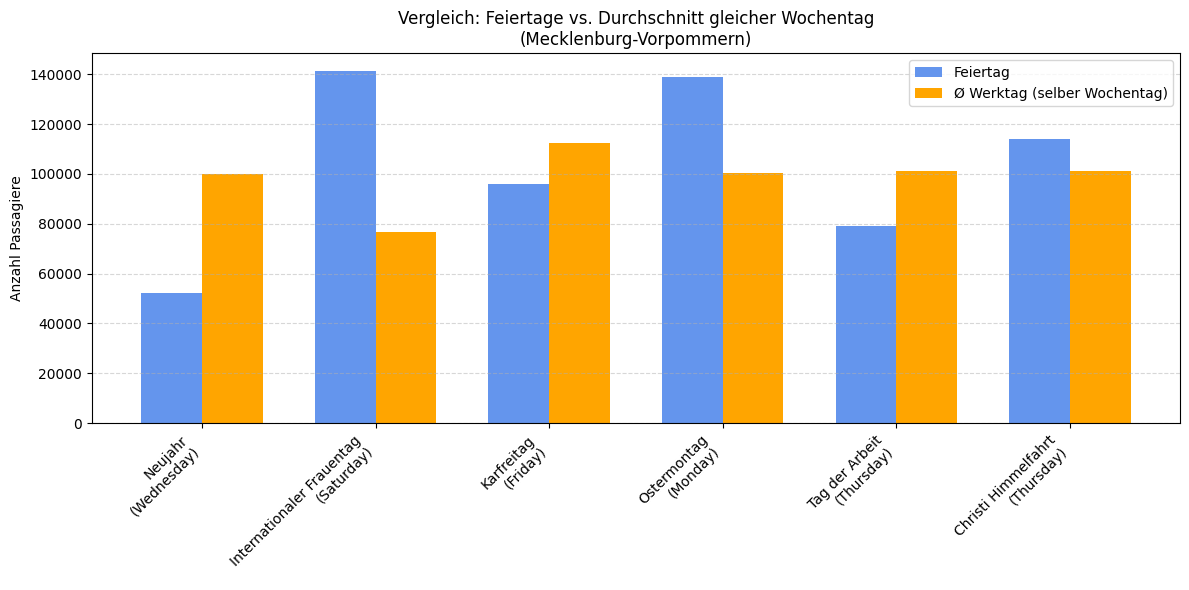

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

result_sorted = result.sort_values("date").copy()

result_sorted["date"] = pd.to_datetime(result_sorted["date"])

result_sorted["weekday"] = result_sorted["date"].dt.strftime("%A")  # e.g., "Monday"

xtick_labels = result_sorted["holiday_name"] + "\n(" + result_sorted["weekday"] + ")"

x = np.arange(len(result_sorted))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, result_sorted["total_pax_on_holiday"], width, label="Feiertag", color='cornflowerblue')
plt.bar(x + width/2, result_sorted["avg_pax_on_weekday"], width, label="Ø Werktag (selber Wochentag)", color='orange')

plt.xticks(x, xtick_labels, rotation=45, ha="right")
plt.ylabel("Anzahl Passagiere")
plt.title("Vergleich: Feiertage vs. Durchschnitt gleicher Wochentag\n(" + mngmt_name + ")")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()
